In [1]:
from google.colab import drive

drive.mount('/content/drive/')


Mounted at /content/drive/


# Segmentação:
Selecione uma rede pré-treinada de segmentação e avalie os resultados para 2, 3, 4 e 5 classes em imagens coloridas. Utilize no mínimo 5 imagens.

In [2]:
!pip install segmentation_models_pytorch

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.1 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=edd16d049ca24b92883605b3a71adbb9e634aa941e0c167009dc1f4db871df96
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=8b96319a114118e3fc1017f959f603eab7026e920040462142aeef145adbd773
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-pytorc

In [3]:
from segmentation_models_pytorch import DeepLabV3
import torch
import cv2
import numpy as np
import torch.nn.functional as F
import imageio
import matplotlib.pyplot as plt
import os
import gc



# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepLabV3(
    encoder_name="mobilenet_v2",  # Lightweight backbone
    encoder_weights="imagenet",  # Pre-trained weights
    classes=21                   # Number of output classes
).to(device)

# Set model to evaluation mode
model.eval()

root_path = '/content/drive/MyDrive/Visão Computacional Robótica/atividade_pratica/datasources/pictures/segmentation'



Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 75.7MB/s]


Utilizei modelo de segmentação DeepLabV3 pré-treinado com pesos da imagenet

In [4]:
img_1 = imageio.imread(f'{root_path}/yuhan-chang-iXnw9EGMKc8-unsplash.jpg')
img_2 = imageio.imread(f'{root_path}/janis-dzenis-xl1Sa0qgAew-unsplash.jpg')
img_3 = imageio.imread(f'{root_path}/samsung-memory-nplkFSNschY-unsplash.jpg')
img_4 = imageio.imread(f'{root_path}/diana-yildirim-eogcwoFLnKI-unsplash.jpg')
img_5 = imageio.imread(f'{root_path}/dorrell-tibbs-m-Zj1gr20kE-unsplash.jpg')

# Calculate padding
results = []
for img in [img_1, img_2, img_3, img_4, img_5]:
    height, width = img.shape[:2]
    pad_h = (8 - height % 8) % 8  # Pad height to nearest multiple of 8
    pad_w = (8 - width % 8) % 8   # Pad width to nearest multiple of 8
    padding = (0, pad_w, 0, pad_h)  # (left, right, top, bottom)

    # Preprocess and pad
    input_tensor = torch.tensor(
        img.transpose(2, 0, 1),  # Convert to C x H x W
        dtype=torch.float32
    ).unsqueeze(0).to(device)  # Add batch dimension

    # Apply padding
    input_tensor = F.pad(input_tensor, padding, mode='constant', value=0)

    # Run inference
    with torch.no_grad():
        result = model(input_tensor)
    results.append(result)
    print("Inference completed. Result shape:", result.shape)
    print(result)


<ipython-input-4-5fb0d463a3d1>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_1 = imageio.imread(f'{root_path}/yuhan-chang-iXnw9EGMKc8-unsplash.jpg')
<ipython-input-4-5fb0d463a3d1>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_2 = imageio.imread(f'{root_path}/janis-dzenis-xl1Sa0qgAew-unsplash.jpg')
<ipython-input-4-5fb0d463a3d1>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` dire

Inference completed. Result shape: torch.Size([1, 21, 1736, 1160])
tensor([[[[-6.4769e-03, -5.7993e-03, -5.1217e-03,  ..., -1.7724e-02,
           -1.8069e-02, -1.8414e-02],
          [-1.1199e-02, -1.0610e-02, -1.0021e-02,  ..., -2.1459e-02,
           -2.1624e-02, -2.1789e-02],
          [-1.5921e-02, -1.5420e-02, -1.4920e-02,  ..., -2.5195e-02,
           -2.5180e-02, -2.5165e-02],
          ...,
          [-3.2104e-03, -1.7993e-03, -3.8824e-04,  ..., -3.3302e-02,
           -3.2923e-02, -3.2545e-02],
          [-2.9584e-03, -2.1523e-03, -1.3461e-03,  ..., -3.2473e-02,
           -3.2059e-02, -3.1646e-02],
          [-2.7064e-03, -2.5052e-03, -2.3040e-03,  ..., -3.1645e-02,
           -3.1196e-02, -3.0746e-02]],

         [[-3.0124e-02, -2.9702e-02, -2.9281e-02,  ..., -2.2245e-02,
           -2.1892e-02, -2.1539e-02],
          [-2.8161e-02, -2.8094e-02, -2.8026e-02,  ..., -2.0802e-02,
           -2.0371e-02, -1.9939e-02],
          [-2.6199e-02, -2.6485e-02, -2.6771e-02,  ..., -1.9

Carreguei as imagens, realizei tratamento prévio (cálculo de padding, transposição da imagem, conversão do dtype para torch.float32). Obtive o tensor input e realizei o treinamento

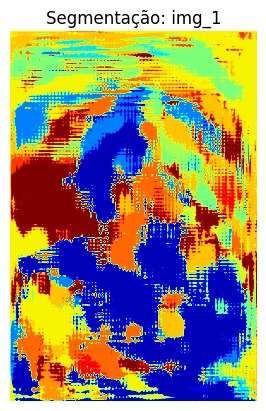

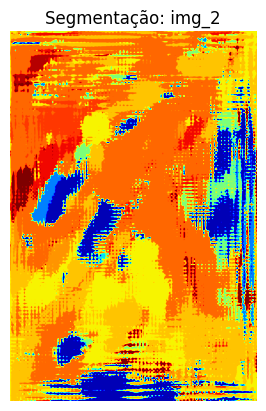

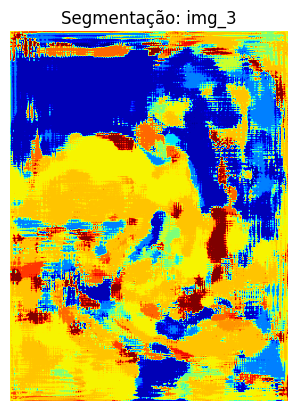

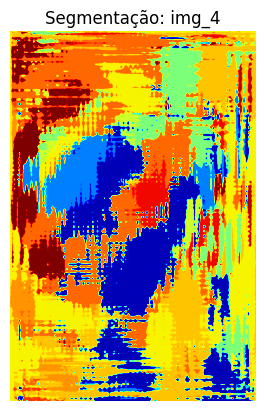

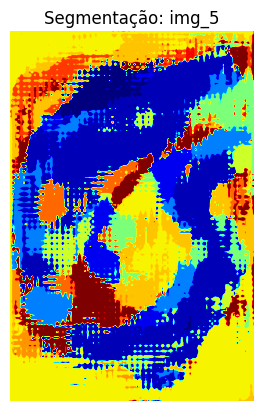

In [10]:


for i, result in enumerate(results):

    # Obtém os rótulos
    result_classes = torch.argmax(result, dim=1).squeeze(0)


    # Visualiza a segmentação
    plt.imshow(result_classes.cpu().numpy(), cmap="jet")
    plt.title(f"Segmentação: img_{i+1}")
    plt.axis("off")
    plt.show()

